<a href="https://colab.research.google.com/github/joelsoaresjr/python_strategies/blob/main/Machine_Learning_finan%C3%A7as.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalar biblioteca financeira

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


Importação das bibliotecas

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from datetime import date
import yfinance as yf
import seaborn as sns
sns.set(rc={'figure.figsize':(30,14)})

from sklearn.preprocessing import MinMaxScaler


import warnings
warnings.simplefilter("ignore")

Download série histórica 

In [3]:
coluna = ['BOVA11', 'ITUB4', 'BBDC4', 'B3SA3', 'PETR4', 'ABEV3', 'PETR3', 'ITSA4', 
          'BBAS3']

coluna = sorted(coluna)

ticker = []
for i in range(len(coluna)):
  ticker.append(coluna[i] + '.SA')

In [4]:
volume = []

for i in range(len(coluna)):
  volume.append(coluna[i] + '.Volume')

price = []

for i in range(len(coluna)):
  price.append(coluna[i] + '.Price')


In [5]:
start = date(2015,1,1)
end = date(2021,8,27)

In [6]:
dados_price = yf.download(ticker, start, end)["Adj Close"]

[*********************100%***********************]  9 of 9 completed


In [7]:
dados_price.columns = price

In [8]:
dados_volume = yf.download(ticker, start, end)["Volume"]

[*********************100%***********************]  9 of 9 completed


In [9]:
dados_volume.columns = volume

In [10]:
dados = pd.DataFrame()

for n in range(0, 8):
  dados.insert(n , dados_price.columns[n], dados_price[dados_price.columns[n]])

In [11]:
for n in range(0, 8):
  dados.insert(n , dados_volume.columns[n], dados_volume[dados_volume.columns[n]])

In [12]:
dados

,ABEV3.Volume,B3SA3.Volume,BBAS3.Volume,BBDC4.Volume,BOVA11.Volume,ITSA4.Volume,ITUB4.Volume,PETR3.Volume,ABEV3.Price,B3SA3.Price,BBAS3.Price,BBDC4.Price,BOVA11.Price,ITSA4.Price,ITUB4.Price,PETR3.Price
Date,,,,,,,,,,,,,,,,
2015-01-02,19396500.0,21734100.0,4750400.0,20142053.0,2755220.0,15296052.0,20756703.0,12710900.0,12.145535,2.362387,14.630776,9.469834,47.259998,4.209186,13.490839,4.747638
2015-01-05,13795900.0,34790100.0,5566200.0,19878785.0,963480.0,29130730.0,23532382.0,25730600.0,11.925673,2.297800,14.327184,9.489368,46.320000,4.222956,13.558636,4.362553
2015-01-06,18610500.0,49214700.0,8465900.0,26416610.0,2024030.0,47761121.0,27725577.0,29754600.0,12.380563,2.320157,14.527431,9.801535,46.580002,4.255088,13.777962,4.251774
2015-01-07,20493500.0,24006600.0,4107200.0,27833207.0,1534970.0,28123675.0,23601897.0,34128300.0,12.554933,2.412069,15.166913,10.191053,48.150002,4.415745,14.276446,4.457505
2015-01-08,9054500.0,22967700.0,3085100.0,15119805.0,2070130.0,22286361.0,21403024.0,37487300.0,13.311452,2.379776,15.218595,10.243547,48.509998,4.461646,14.499770,4.758189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-20,34873200.0,31296800.0,10487200.0,31478480.0,7724065.0,34885830.0,34702500.0,12420500.0,16.881186,13.423620,27.467180,19.854918,113.650002,10.093481,29.155190,16.710085
2021-08-23,17262100.0,36205000.0,18878500.0,31936080.0,5013969.0,26351115.0,21529700.0,21931900.0,16.707947,12.903690,27.716797,19.995356,113.050003,10.138620,29.468370,17.270166
2021-08-24,18073900.0,33260300.0,15528800.0,40907240.0,7336760.0,21338625.0,30154700.0,9774200.0,16.929308,13.140022,28.622513,20.522015,115.629997,10.355297,30.290468,17.467117


In [13]:
data = dados.copy()

In [14]:
data[data.columns[8:]] = data[data.columns[8:]].pct_change()

In [15]:
data

,ABEV3.Volume,B3SA3.Volume,BBAS3.Volume,BBDC4.Volume,BOVA11.Volume,ITSA4.Volume,ITUB4.Volume,PETR3.Volume,ABEV3.Price,B3SA3.Price,BBAS3.Price,BBDC4.Price,BOVA11.Price,ITSA4.Price,ITUB4.Price,PETR3.Price
Date,,,,,,,,,,,,,,,,
2015-01-02,19396500.0,21734100.0,4750400.0,20142053.0,2755220.0,15296052.0,20756703.0,12710900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,13795900.0,34790100.0,5566200.0,19878785.0,963480.0,29130730.0,23532382.0,25730600.0,-0.018102,-0.027339,-0.020750,0.002063,-0.019890,0.003271,0.005025,-0.081111
2015-01-06,18610500.0,49214700.0,8465900.0,26416610.0,2024030.0,47761121.0,27725577.0,29754600.0,0.038144,0.009729,0.013977,0.032896,0.005613,0.007609,0.016176,-0.025393
2015-01-07,20493500.0,24006600.0,4107200.0,27833207.0,1534970.0,28123675.0,23601897.0,34128300.0,0.014084,0.039615,0.044019,0.039741,0.033705,0.037756,0.036180,0.048387
2015-01-08,9054500.0,22967700.0,3085100.0,15119805.0,2070130.0,22286361.0,21403024.0,37487300.0,0.060257,-0.013388,0.003408,0.005151,0.007477,0.010395,0.015643,0.067456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-20,34873200.0,31296800.0,10487200.0,31478480.0,7724065.0,34885830.0,34702500.0,12420500.0,0.020361,0.001410,0.001348,-0.005714,0.007089,0.001792,-0.003679,-0.000368
2021-08-23,17262100.0,36205000.0,18878500.0,31936080.0,5013969.0,26351115.0,21529700.0,21931900.0,-0.010262,-0.038732,0.009088,0.007073,-0.005279,0.004472,0.010742,0.033518
2021-08-24,18073900.0,33260300.0,15528800.0,40907240.0,7336760.0,21338625.0,30154700.0,9774200.0,0.013249,0.018315,0.032678,0.026339,0.022822,0.021371,0.027898,0.011404


In [16]:
volatilidade = []

for i in range(len(coluna)):
  volatilidade.append(coluna[i] + '.Volatilidade')

In [17]:
for i, name in enumerate(volatilidade):
  data[name] =  data[data.columns[i+8]].rolling(21).std() * np.sqrt(252)

In [18]:
data

,ABEV3.Volume,B3SA3.Volume,BBAS3.Volume,BBDC4.Volume,BOVA11.Volume,ITSA4.Volume,ITUB4.Volume,PETR3.Volume,ABEV3.Price,B3SA3.Price,...,PETR3.Price,ABEV3.Volatilidade,B3SA3.Volatilidade,BBAS3.Volatilidade,BBDC4.Volatilidade,BOVA11.Volatilidade,ITSA4.Volatilidade,ITUB4.Volatilidade,PETR3.Volatilidade,PETR4.Volatilidade
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,19396500.0,21734100.0,4750400.0,20142053.0,2755220.0,15296052.0,20756703.0,12710900.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,13795900.0,34790100.0,5566200.0,19878785.0,963480.0,29130730.0,23532382.0,25730600.0,-0.018102,-0.027339,...,-0.081111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,18610500.0,49214700.0,8465900.0,26416610.0,2024030.0,47761121.0,27725577.0,29754600.0,0.038144,0.009729,...,-0.025393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,20493500.0,24006600.0,4107200.0,27833207.0,1534970.0,28123675.0,23601897.0,34128300.0,0.014084,0.039615,...,0.048387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-08,9054500.0,22967700.0,3085100.0,15119805.0,2070130.0,22286361.0,21403024.0,37487300.0,0.060257,-0.013388,...,0.067456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-20,34873200.0,31296800.0,10487200.0,31478480.0,7724065.0,34885830.0,34702500.0,12420500.0,0.020361,0.001410,...,-0.000368,0.308303,0.469557,0.229686,0.222073,0.178864,0.219740,0.244583,0.415639,0.329518
2021-08-23,17262100.0,36205000.0,18878500.0,31936080.0,5013969.0,26351115.0,21529700.0,21931900.0,-0.010262,-0.038732,...,0.033518,0.304470,0.482505,0.233524,0.223094,0.177240,0.220056,0.246150,0.425538,0.301583
2021-08-24,18073900.0,33260300.0,15528800.0,40907240.0,7336760.0,21338625.0,30154700.0,9774200.0,0.013249,0.018315,...,0.011404,0.300043,0.489626,0.256856,0.241784,0.194992,0.229751,0.256721,0.422502,0.238221


In [19]:
data['alvo'] = dados['BOVA11.Price'].shift(1)

In [20]:
data

,ABEV3.Volume,B3SA3.Volume,BBAS3.Volume,BBDC4.Volume,BOVA11.Volume,ITSA4.Volume,ITUB4.Volume,PETR3.Volume,ABEV3.Price,B3SA3.Price,...,ABEV3.Volatilidade,B3SA3.Volatilidade,BBAS3.Volatilidade,BBDC4.Volatilidade,BOVA11.Volatilidade,ITSA4.Volatilidade,ITUB4.Volatilidade,PETR3.Volatilidade,PETR4.Volatilidade,alvo
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,19396500.0,21734100.0,4750400.0,20142053.0,2755220.0,15296052.0,20756703.0,12710900.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,13795900.0,34790100.0,5566200.0,19878785.0,963480.0,29130730.0,23532382.0,25730600.0,-0.018102,-0.027339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.259998
2015-01-06,18610500.0,49214700.0,8465900.0,26416610.0,2024030.0,47761121.0,27725577.0,29754600.0,0.038144,0.009729,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.320000
2015-01-07,20493500.0,24006600.0,4107200.0,27833207.0,1534970.0,28123675.0,23601897.0,34128300.0,0.014084,0.039615,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.580002
2015-01-08,9054500.0,22967700.0,3085100.0,15119805.0,2070130.0,22286361.0,21403024.0,37487300.0,0.060257,-0.013388,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.150002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-20,34873200.0,31296800.0,10487200.0,31478480.0,7724065.0,34885830.0,34702500.0,12420500.0,0.020361,0.001410,...,0.308303,0.469557,0.229686,0.222073,0.178864,0.219740,0.244583,0.415639,0.329518,112.849998
2021-08-23,17262100.0,36205000.0,18878500.0,31936080.0,5013969.0,26351115.0,21529700.0,21931900.0,-0.010262,-0.038732,...,0.304470,0.482505,0.233524,0.223094,0.177240,0.220056,0.246150,0.425538,0.301583,113.650002
2021-08-24,18073900.0,33260300.0,15528800.0,40907240.0,7336760.0,21338625.0,30154700.0,9774200.0,0.013249,0.018315,...,0.300043,0.489626,0.256856,0.241784,0.194992,0.229751,0.256721,0.422502,0.238221,113.050003


In [21]:
data.dropna(inplace = True)

In [22]:
 data['alvo']

Date
2015-03-04     49.830002
2015-03-05     49.070000
2015-03-06     48.950001
2015-03-09     48.549999
2015-03-10     47.750000
                 ...    
2021-08-20    112.849998
2021-08-23    113.650002
2021-08-24    113.050003
2021-08-25    115.629997
2021-08-26    116.139999
Name: alvo, Length: 1611, dtype: float64

Separação bse de dados treinamento e teste

In [23]:
alvo_treinamento = data['alvo'][: '2020-12-31']

In [24]:
previsores_treinamento = data.iloc[: , :25][: '2020-12-31']

In [25]:
alvo_teste = data['alvo']['2020-12-31':]

In [26]:
previsores_teste = data.iloc[: , :25]['2020-12-31':]

In [27]:
scaler = MinMaxScaler()

In [28]:
previsores_treinamento_scaler = scaler.fit_transform(previsores_treinamento)

In [29]:
previsores_teste_scaler = scaler.transform(previsores_teste)

Trade com Árvore de decisão + regressão

In [30]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(previsores_treinamento_scaler , alvo_treinamento)
score = regressor.score(previsores_treinamento_scaler , alvo_treinamento)

In [31]:
previsoes = pd.DataFrame(regressor.predict(previsores_teste))

In [32]:
def trade_1(previsoes):

  trade = pd.DataFrame()

  lista = []

  for i in range(len(previsoes)):

    if previsoes.pct_change()[0][i] < 0:
      lista.append(-1)
    else:
      lista.append(1)

  trade['Regra'] = lista

  trade['Retornos ibov'] = alvo_teste.pct_change().values

  trade['Retornos Previsão'] = previsoes.pct_change()

  trade['Retornos Arvore com Regressão'] = trade['Retornos ibov'] * trade['Regra']

  trade['Retorno Acum Ibov'] = (1 + trade['Retornos ibov']).cumprod()
  trade['Retorno Acum Ibov'][0] = 1

  trade['Retorno Acum Arvore com Regressão'] = (1 + trade['Retornos Arvore com Regressão']).cumprod()
  trade['Retorno Acum Arvore com Regressão'][0] = 1

  trade.index = alvo_teste.index

  return trade




In [33]:
arvore_regressao = trade_1(previsoes)

In [34]:
arvore_regressao.head(50)

,Regra,Retornos ibov,Retornos Previsão,Retornos Arvore com Regressão,Retorno Acum Ibov,Retorno Acum Arvore com Regressão
Date,,,,,,
2021-01-04,1,NaN,NaN,NaN,1.000000,1.000000
2021-01-05,1,-0.004884,0.007986,-0.004884,0.995116,0.995116
2021-01-06,1,0.005259,0.001863,0.005259,1.000349,1.000349
2021-01-07,-1,0.007498,-0.008996,-0.007498,1.007850,0.992848
2021-01-08,1,0.024405,0.000257,0.024405,1.032447,1.017078
2021-01-11,-1,0.017150,-0.006295,-0.017150,1.050153,0.999636
2021-01-12,1,-0.014784,0.066171,-0.014784,1.034627,0.984857
2021-01-13,1,0.006997,0.364780,0.006997,1.041867,0.991748
2021-01-14,1,-0.017497,0.007644,-0.017497,1.023637,0.974396


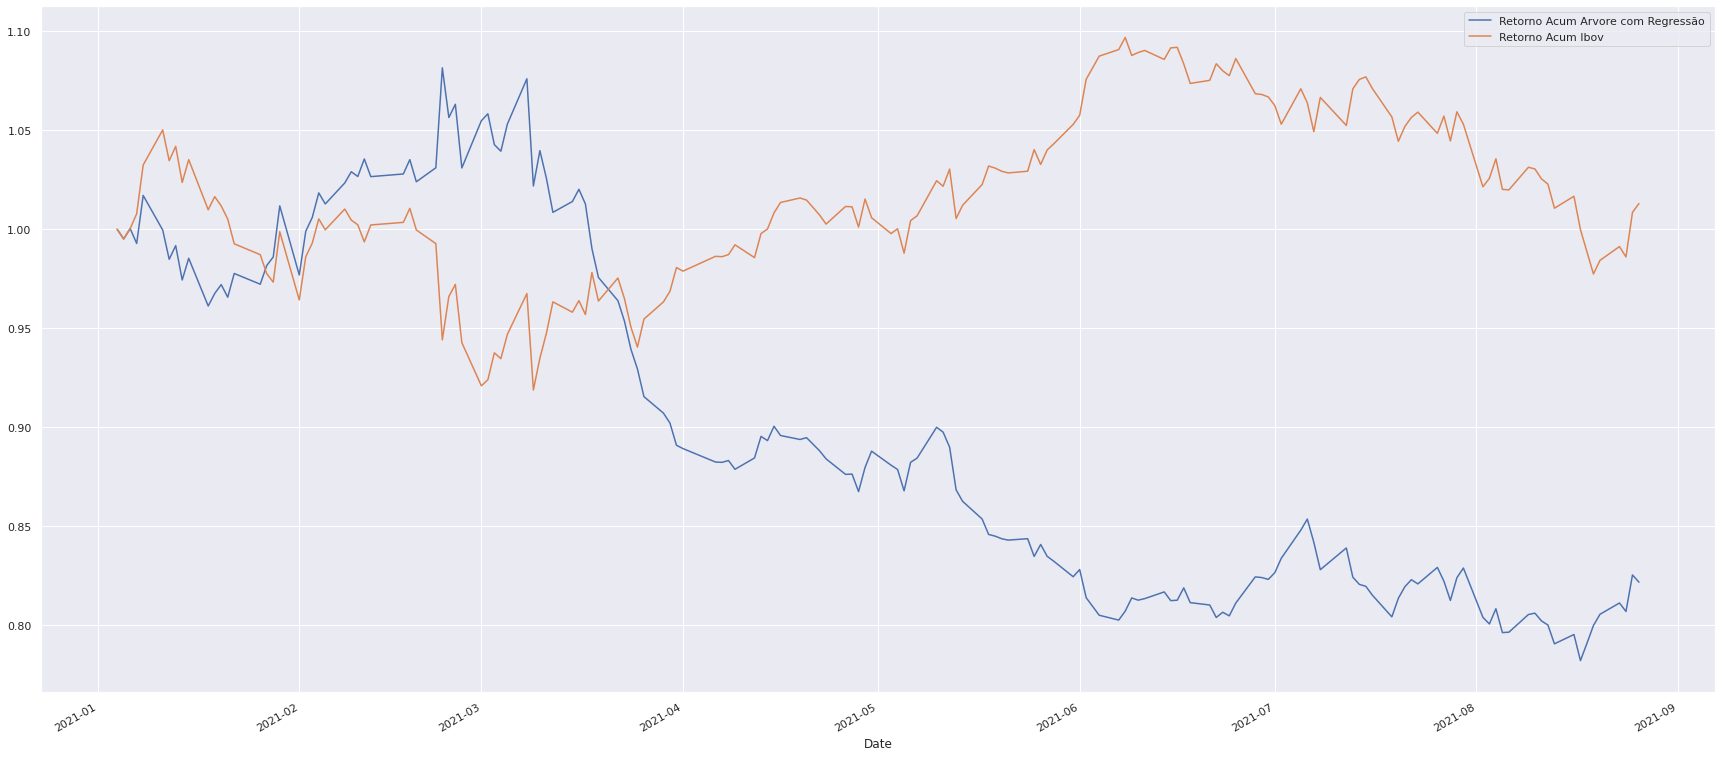

In [35]:
arvore_regressao[['Retorno Acum Arvore com Regressão', 'Retorno Acum Ibov']].plot()

Trade com Árvore de decisão

In [36]:
from sklearn.tree import DecisionTreeRegressor
regressor_decision = DecisionTreeRegressor()

In [37]:
regressor_decision.fit(previsores_treinamento_scaler, alvo_treinamento)

DecisionTreeRegressor()

In [38]:
previsoes_decision = pd.DataFrame(regressor_decision.predict(previsores_teste_scaler))

In [39]:
def trade_2(previsoes):

  trade = pd.DataFrame()

  lista = []

  for i in range(len(previsoes)):

    if previsoes.pct_change()[0][i] < 0:
      lista.append(-1)
    else:
      lista.append(1)

  trade['Regra'] = lista

  trade['Retornos ibov'] = alvo_teste.pct_change().values

  trade['Retornos Previsão'] = previsoes.pct_change()

  trade['Retornos Decision'] = trade['Retornos ibov'] * trade['Regra']

  trade['Retorno Acum Ibov'] = (1 + trade['Retornos ibov']).cumprod()
  trade['Retorno Acum Ibov'][0] = 1

  trade['Retorno Acum Decision'] = (1 + trade['Retornos Decision']).cumprod()
  trade['Retorno Acum Decision'][0] = 1

  trade.index = alvo_teste.index

  return trade

In [40]:
decision = trade_2(previsoes_decision)

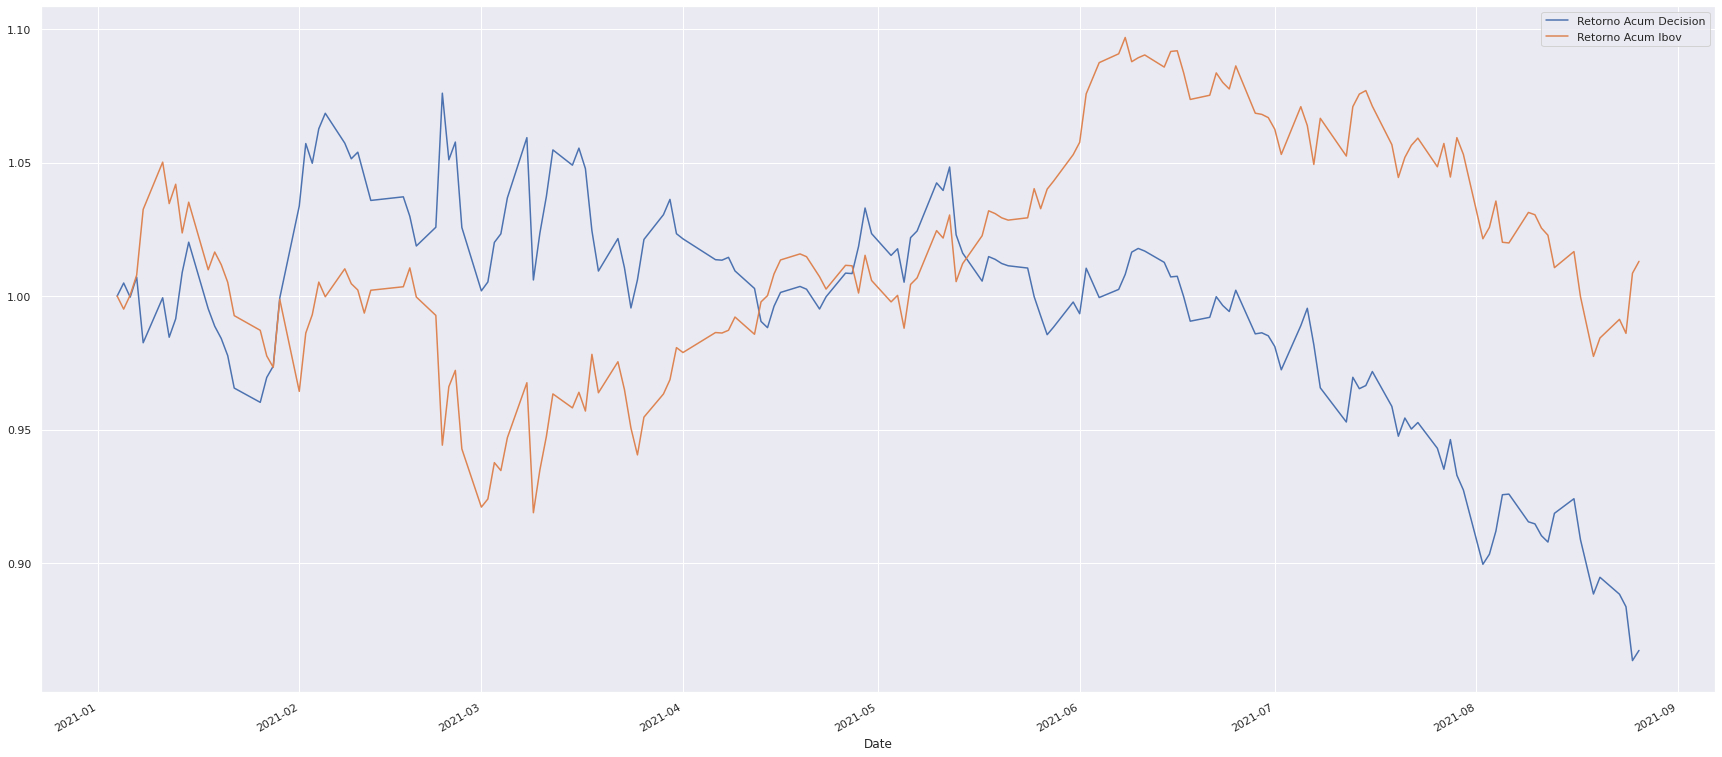

In [41]:
decision[['Retorno Acum Decision', 'Retorno Acum Ibov']].plot()

Trade com regressão logística

In [42]:
alvo_teste_class = np.where(alvo_teste.pct_change()<0, -1, 1)
alvo_treinamento_class = np.where(alvo_treinamento.pct_change()<0, -1, 1)

In [43]:
from sklearn.linear_model import LogisticRegression
classificador_log = LogisticRegression()
classificador_log.fit(previsores_treinamento, alvo_treinamento_class)

LogisticRegression()

In [44]:
previsoes_reg_log = pd.DataFrame(classificador_log.predict(previsores_teste_scaler))

In [45]:
def trade_3(previsoes):

  trade = pd.DataFrame()

  lista = []

  for i in range(len(previsoes)):

    if previsoes.pct_change()[0][i] < 0:
      lista.append(-1)
    else:
      lista.append(1)

  trade['Regra'] = lista

  trade['Retornos ibov'] = alvo_teste.pct_change().values

  trade['Retornos Previsão'] = previsoes.pct_change()

  trade['Retornos Regre Log'] = trade['Retornos ibov'] * trade['Regra']

  trade['Retorno Acum Ibov'] = (1 + trade['Retornos ibov']).cumprod()
  trade['Retorno Acum Ibov'][0] = 1

  trade['Retorno Acum Regre Log'] = (1 + trade['Retornos Regre Log']).cumprod()
  trade['Retorno Acum Regre Log'][0] = 1

  trade.index = alvo_teste.index

  return trade

In [46]:
regre_log = trade_3(previsoes_reg_log)

In [47]:
regre_log

,Regra,Retornos ibov,Retornos Previsão,Retornos Regre Log,Retorno Acum Ibov,Retorno Acum Regre Log
Date,,,,,,
2021-01-04,1,NaN,NaN,NaN,1.000000,1.000000
2021-01-05,1,-0.004884,0.0,-0.004884,0.995116,0.995116
2021-01-06,1,0.005259,0.0,0.005259,1.000349,1.000349
2021-01-07,1,0.007498,0.0,0.007498,1.007850,1.007850
2021-01-08,1,0.024405,0.0,0.024405,1.032447,1.032447
...,...,...,...,...,...,...
2021-08-20,1,0.007050,0.0,0.007050,0.984300,0.965842
2021-08-23,1,0.007089,0.0,0.007089,0.991278,0.972689
2021-08-24,1,-0.005279,0.0,-0.005279,0.986044,0.967554


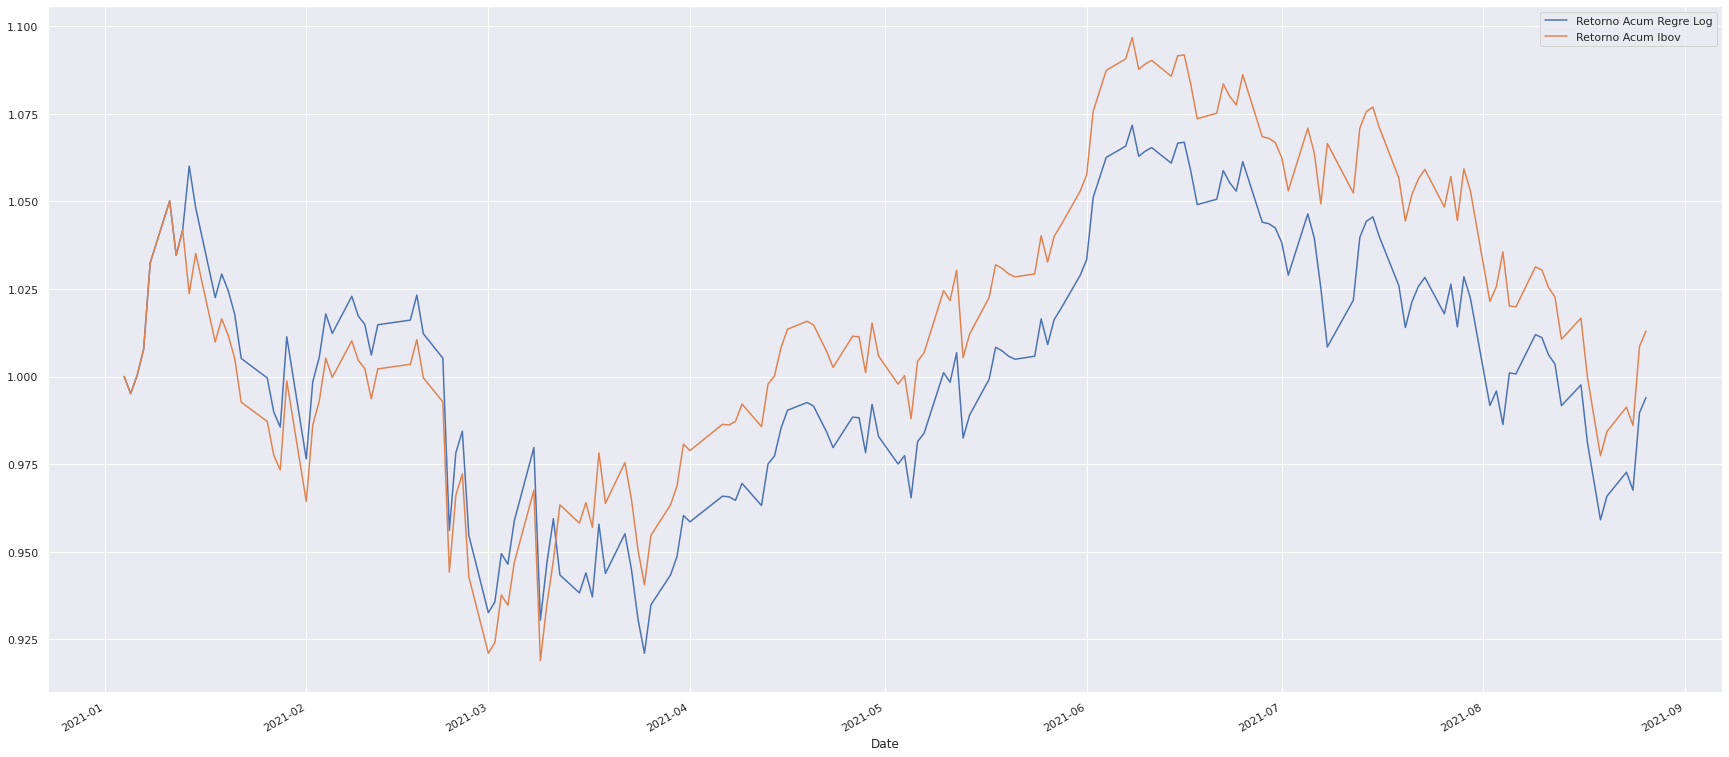

In [48]:
regre_log[['Retorno Acum Regre Log', 'Retorno Acum Ibov']].plot()

Trade com Regressão Linear

In [49]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(previsores_treinamento_scaler, alvo_treinamento)

LinearRegression()

In [50]:
previsoes_linear = pd.DataFrame(regressor_linear.predict(previsores_teste_scaler))

In [51]:
def trade_4(previsoes):

  trade = pd.DataFrame()

  lista = []

  for i in range(len(previsoes)):

    if previsoes.pct_change()[0][i] < 0:
      lista.append(-1)
    else:
      lista.append(1)

  trade['Regra'] = lista

  trade['Retornos ibov'] = alvo_teste.pct_change().values

  trade['Retornos Previsão'] = previsoes.pct_change()

  trade['Retornos Regre Linear'] = trade['Retornos ibov'] * trade['Regra']

  trade['Retorno Acum Ibov'] = (1 + trade['Retornos ibov']).cumprod()
  trade['Retorno Acum Ibov'][0] = 1

  trade['Retorno Acum Regre Linear'] = (1 + trade['Retornos Regre Linear']).cumprod()
  trade['Retorno Acum Regre Linear'][0] = 1

  trade.index = alvo_teste.index

  return trade

In [52]:
regre_linear = trade_4(previsoes_linear)

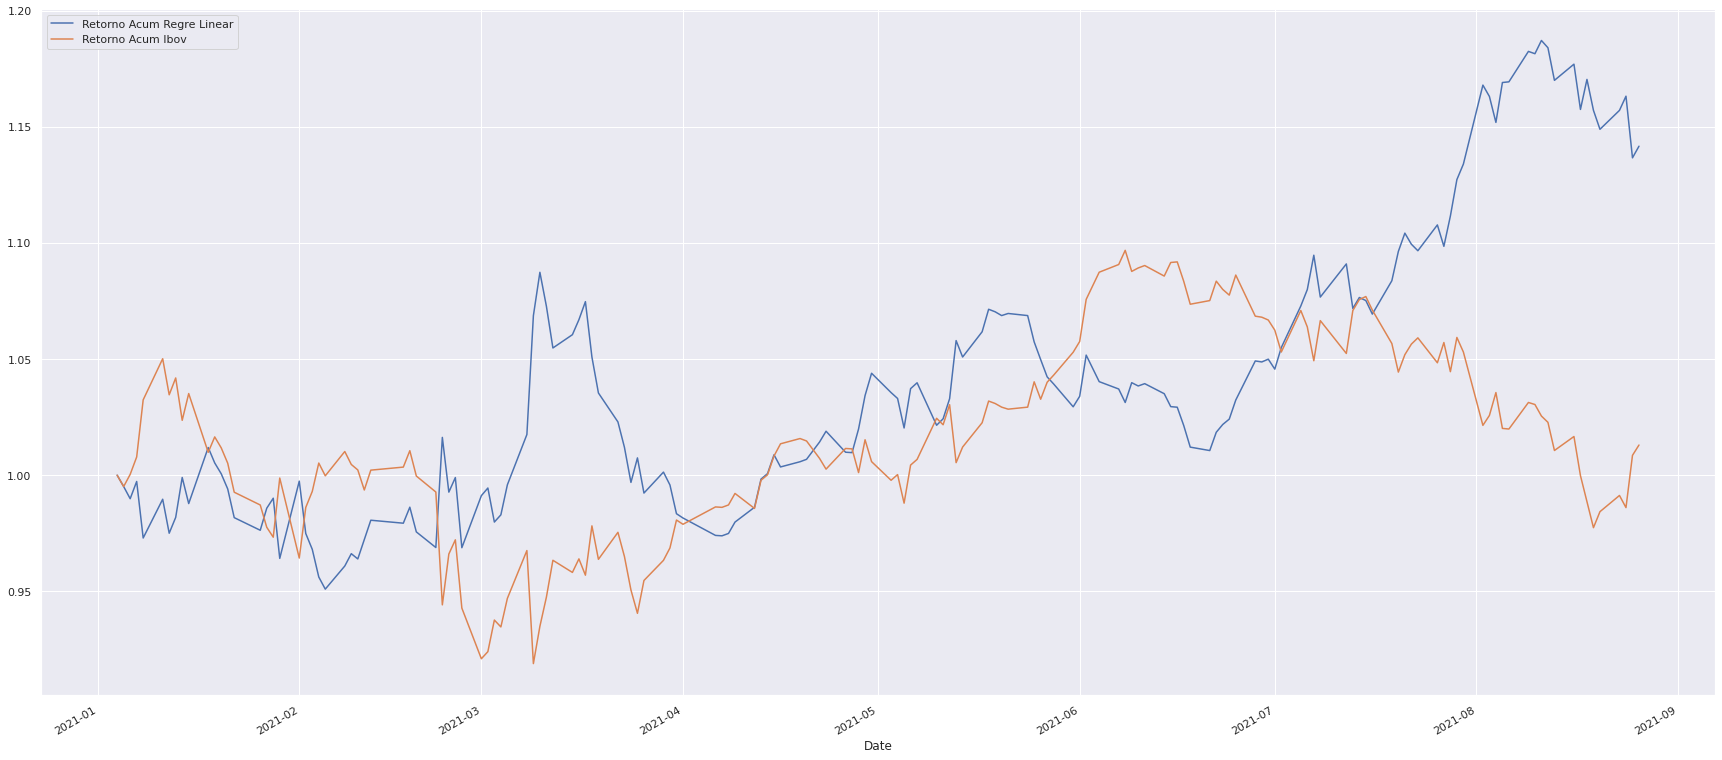

In [53]:
regre_linear[['Retorno Acum Regre Linear', 'Retorno Acum Ibov']].plot()

Trade com SVR

In [54]:
from sklearn.svm import SVR 
regressor_SVR = SVR(kernel = 'linear')       
regressor_SVR.fit(previsores_treinamento_scaler, alvo_treinamento)

SVR(kernel='linear')

In [55]:
previsoes_SVR = pd.DataFrame(regressor_SVR.predict(previsores_teste_scaler))

In [56]:
def trade_5(previsoes):

  trade = pd.DataFrame()

  lista = []

  for i in range(len(previsoes)):

    if previsoes.pct_change()[0][i] < 0:
      lista.append(-1)
    else:
      lista.append(1)

  trade['Regra'] = lista

  trade['Retornos ibov'] = alvo_teste.pct_change().values

  trade['Retornos Previsão'] = previsoes.pct_change()

  trade['Retornos SVR'] = trade['Retornos ibov'] * trade['Regra']

  trade['Retorno Acum Ibov'] = (1 + trade['Retornos ibov']).cumprod()
  trade['Retorno Acum Ibov'][0] = 1

  trade['Retorno Acum SVR'] = (1 + trade['Retornos SVR']).cumprod()
  trade['Retorno Acum SVR'][0] = 1

  trade.index = alvo_teste.index

  return trade

In [57]:
regre_SVR = trade_5(previsoes_SVR)

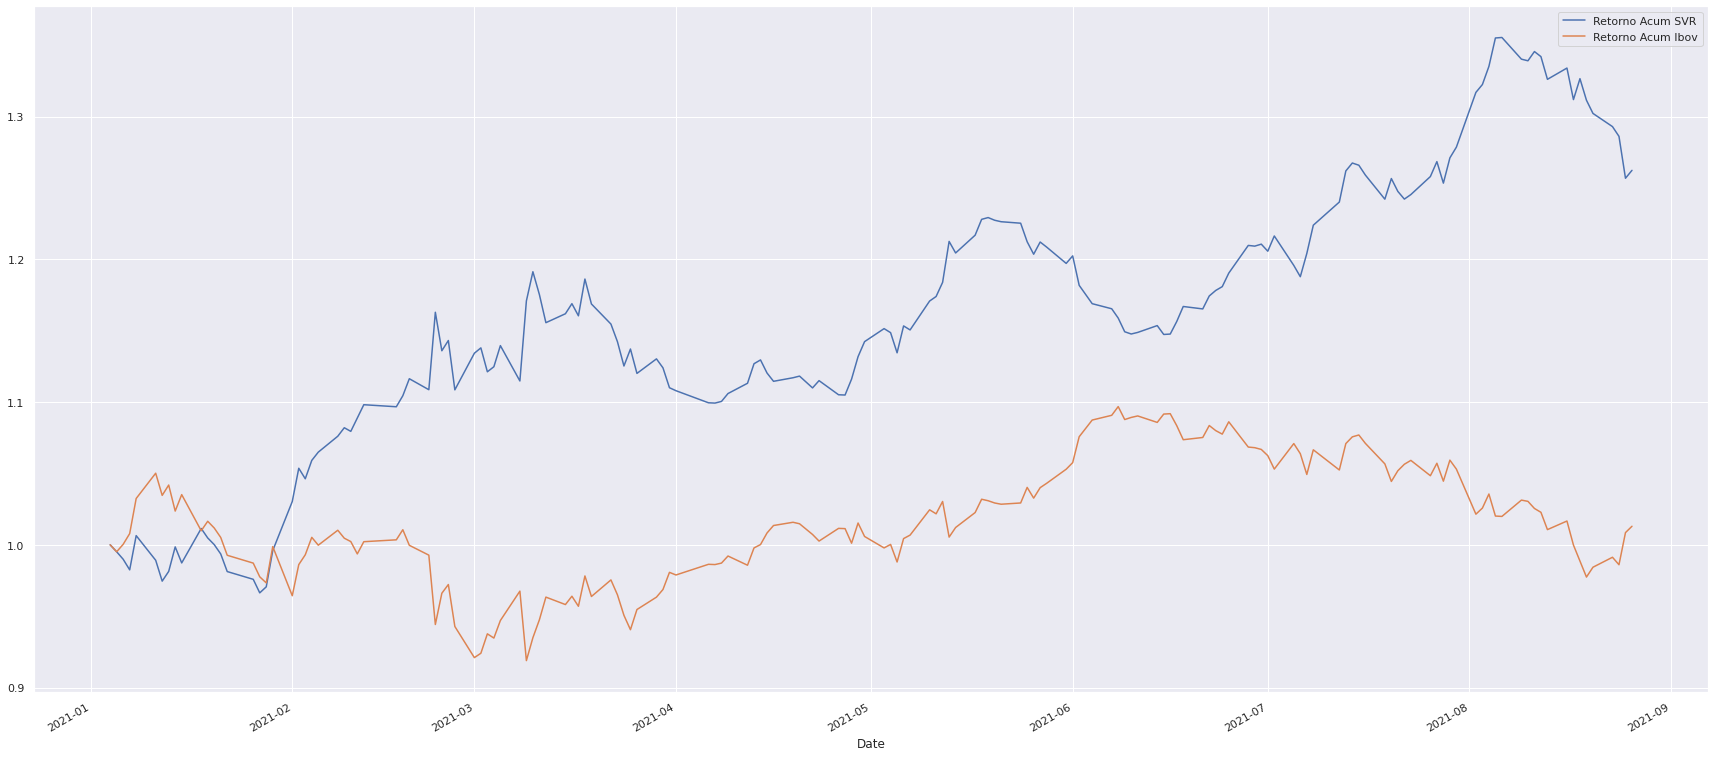

In [58]:
regre_SVR[['Retorno Acum SVR', 'Retorno Acum Ibov']].plot()

Trade com Rede Neural

In [59]:
from sklearn.neural_network import MLPRegressor
regressor_rede = MLPRegressor(hidden_layer_sizes = (50,25, 10, 4))
regressor_rede.fit(previsores_treinamento_scaler, alvo_treinamento)

MLPRegressor(hidden_layer_sizes=(50, 25, 10, 4))

In [60]:
previsoes_rede = pd.DataFrame(regressor_rede.predict(previsores_teste_scaler))

In [61]:
def trade_6(previsoes):

  trade = pd.DataFrame()

  lista = []

  for i in range(len(previsoes)):

    if previsoes.pct_change()[0][i] < 0:
      lista.append(-1)
    else:
      lista.append(1)

  trade['Regra'] = lista

  trade['Retornos ibov'] = alvo_teste.pct_change().values

  trade['Retornos Previsão'] = previsoes.pct_change()

  trade['Retornos Rede_Neural'] = trade['Retornos ibov'] * trade['Regra']

  trade['Retorno Acum Ibov'] = (1 + trade['Retornos ibov']).cumprod()
  trade['Retorno Acum Ibov'][0] = 1

  trade['Retorno Acum Rede_Neural'] = (1 + trade['Retornos Rede_Neural']).cumprod()
  trade['Retorno Acum Rede_Neural'][0] = 1

  trade.index = alvo_teste.index

  return trade

In [62]:
rede_neural = trade_6(previsoes_rede)

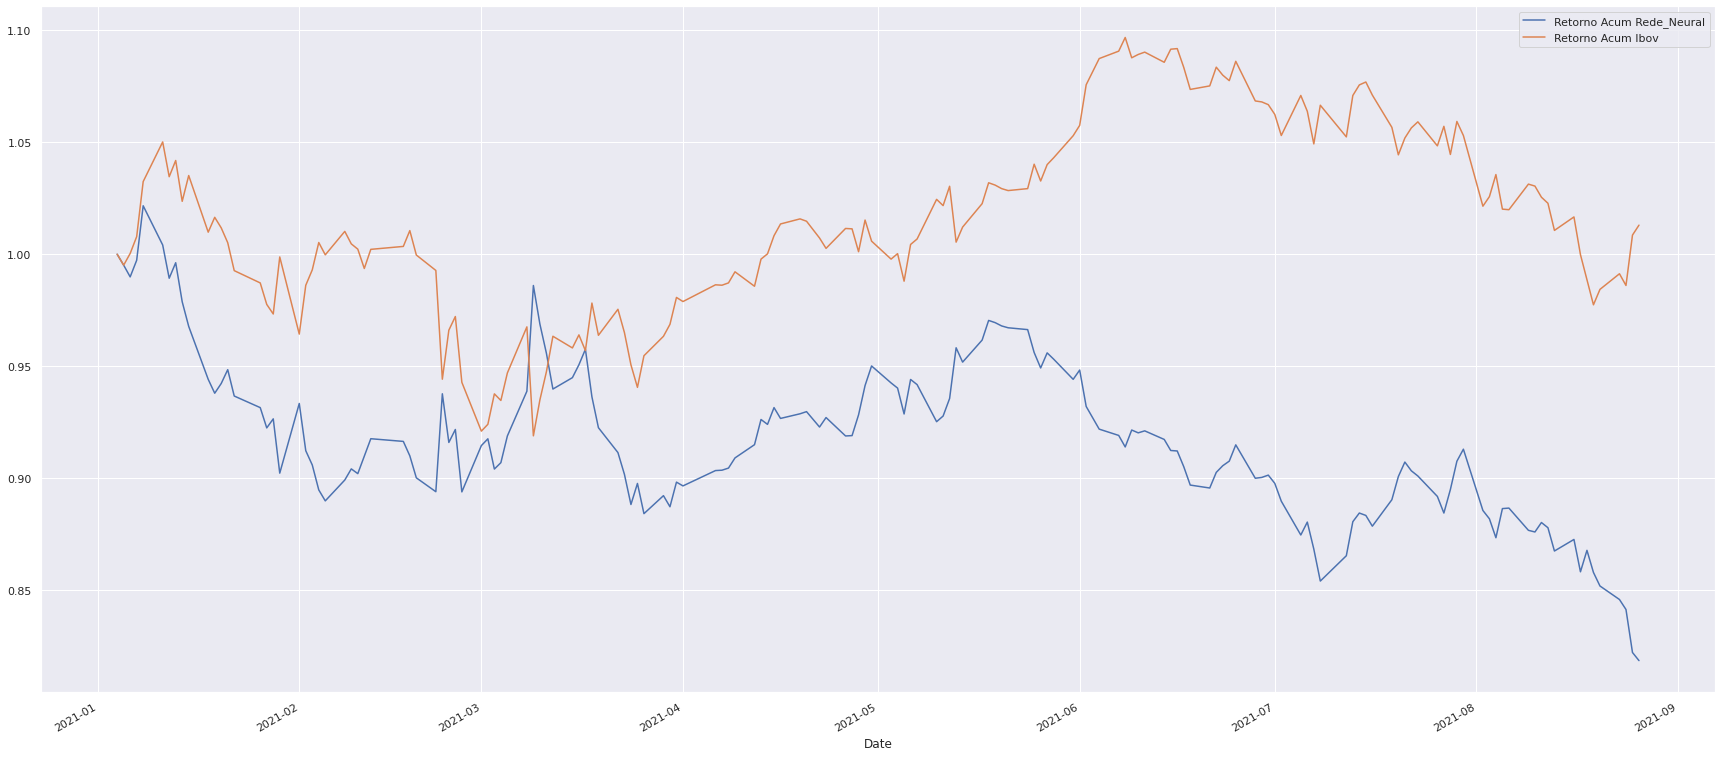

In [63]:
rede_neural[['Retorno Acum Rede_Neural', 'Retorno Acum Ibov']].plot()

In [64]:
rede_neural[['Retorno Acum Rede_Neural', 'Retorno Acum Ibov']],
regre_SVR[['Retorno Acum SVR', 'Retorno Acum Ibov']],
regre_linear[['Retorno Acum Regre Linear', 'Retorno Acum Ibov']],
regre_log[['Retorno Acum Regre Log', 'Retorno Acum Ibov']],
decision[['Retorno Acum Decision', 'Retorno Acum Ibov']],
arvore_regressao[['Retorno Acum Arvore com Regressão', 'Retorno Acum Ibov']]

,Retorno Acum Arvore com Regressão,Retorno Acum Ibov
Date,,
2021-01-04,1.000000,1.000000
2021-01-05,0.995116,0.995116
2021-01-06,1.000349,1.000349
2021-01-07,0.992848,1.007850
2021-01-08,1.017078,1.032447
...,...,...
2021-08-20,0.805645,0.984300
2021-08-23,0.811356,0.991278
2021-08-24,0.807073,0.986044


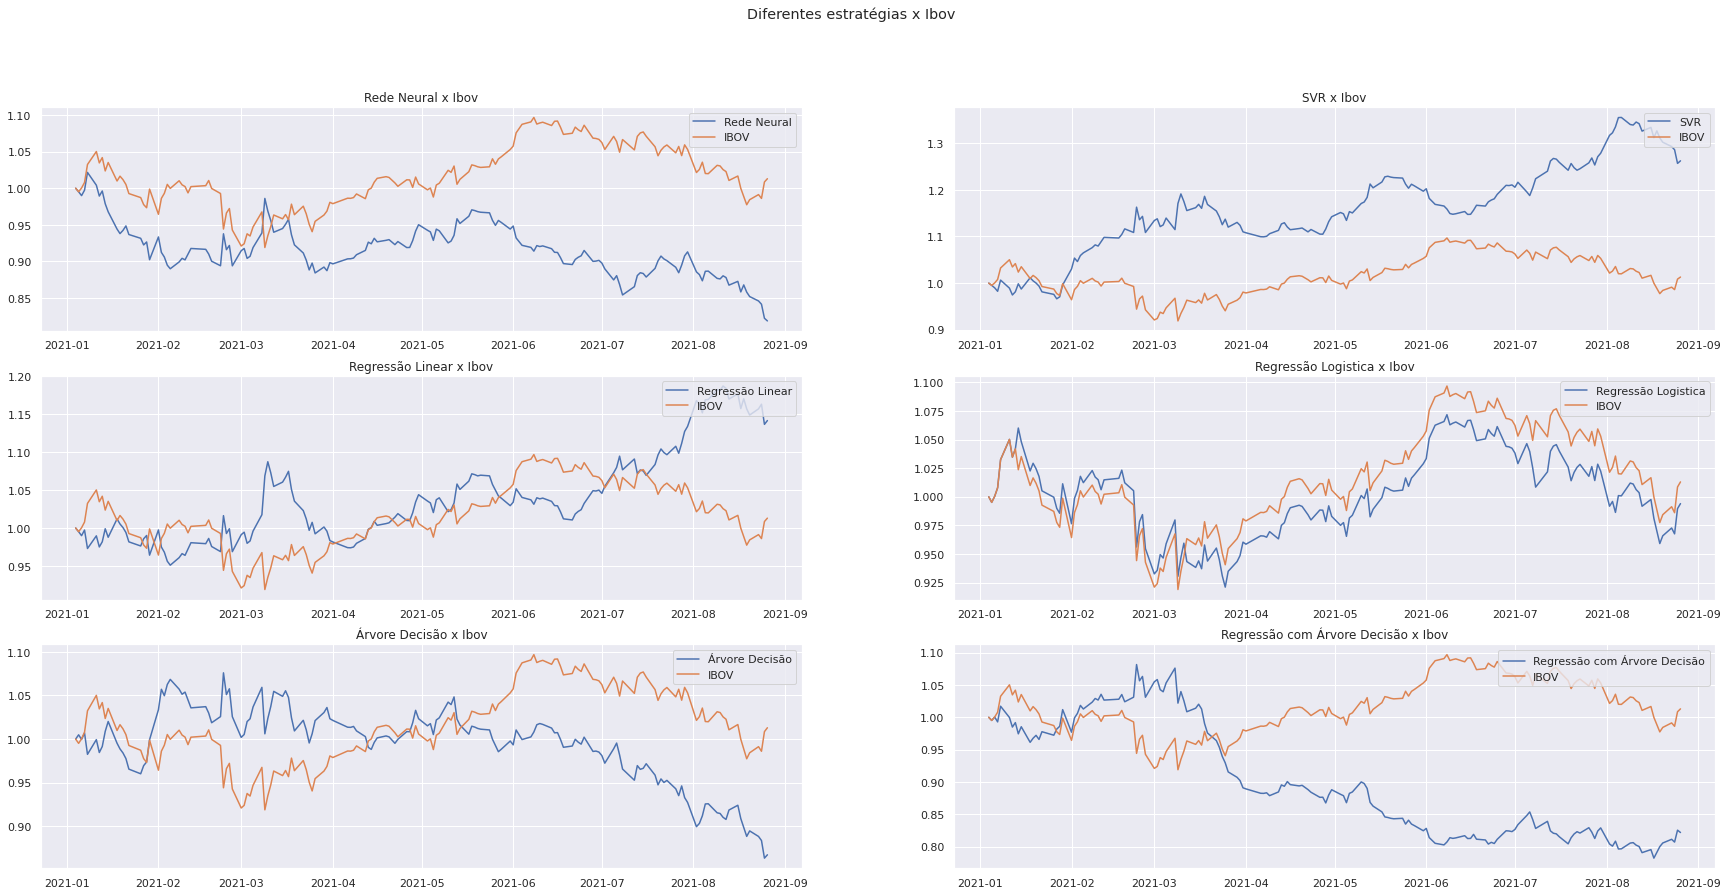

In [65]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)

fig.suptitle('Diferentes estratégias x Ibov')

#REDE NEURAL
ax1.plot(rede_neural.index,  rede_neural['Retorno Acum Rede_Neural'], label = "Rede Neural")
ax1.plot(rede_neural.index,  rede_neural['Retorno Acum Ibov'],  label = "IBOV")
ax1.set_title("Rede Neural x Ibov")
ax1.legend( loc = 1 )

#SVR
ax2.plot(rede_neural.index,  regre_SVR['Retorno Acum SVR'], label = "SVR")
ax2.plot(rede_neural.index,  rede_neural['Retorno Acum Ibov'],  label = "IBOV")
ax2.set_title("SVR x Ibov")
ax2.legend( loc = 1 )

#REGRESSÃO LINEAR
ax3.plot(rede_neural.index,  regre_linear['Retorno Acum Regre Linear'], label = "Regressão Linear")
ax3.plot(rede_neural.index,  rede_neural['Retorno Acum Ibov'],  label = "IBOV")
ax3.set_title("Regressão Linear x Ibov")
ax3.legend( loc = 1 )

#REGRESSÃO LOGISTICA
ax4.plot(rede_neural.index,  regre_log['Retorno Acum Regre Log'], label = "Regressão Logistica")
ax4.plot(rede_neural.index,  rede_neural['Retorno Acum Ibov'],  label = "IBOV")
ax4.set_title("Regressão Logistica x Ibov")
ax4.legend( loc = 1 )

#DecisionTree
ax5.plot(rede_neural.index,  decision['Retorno Acum Decision'], label = "Árvore Decisão")
ax5.plot(rede_neural.index,  rede_neural['Retorno Acum Ibov'],  label = "IBOV")
ax5.set_title("Árvore Decisão x Ibov")
ax5.legend( loc = 1 )

#Regressão Com DecisonTree
ax6.plot(rede_neural.index,  arvore_regressao['Retorno Acum Arvore com Regressão'], label = "Regressão com Árvore Decisão")
ax6.plot(rede_neural.index,  rede_neural['Retorno Acum Ibov'],  label = "IBOV")
ax6.set_title("Regressão com Árvore Decisão x Ibov")
ax6.legend( loc = 1 )

In [66]:
neutra = np.where(rede_neural['Retorno Acum Rede_Neural']<0, 1 ,1)

In [67]:
import plotly.graph_objects as go

In [68]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = rede_neural.index, y = rede_neural['Retorno Acum Rede_Neural'], mode='lines', name="Rede Neural"))
fig.add_trace(go.Scatter(x = rede_neural.index, y =  regre_SVR['Retorno Acum SVR'], mode='lines', name="SVR"))
fig.add_trace(go.Scatter(x = rede_neural.index, y =  regre_linear['Retorno Acum Regre Linear'], mode='lines', name="Regressão Linear"))
fig.add_trace(go.Scatter(x = rede_neural.index, y =  regre_log['Retorno Acum Regre Log'], mode='lines', name="Regressão Logística"))
fig.add_trace(go.Scatter(x = rede_neural.index, y =  decision['Retorno Acum Decision'], mode='lines', name="Árvore Decisão"))
fig.add_trace(go.Scatter(x = rede_neural.index, y =  arvore_regressao['Retorno Acum Arvore com Regressão'], mode='lines', name="Regressão com Árvore Decisão"))
fig.add_trace(go.Scatter(x = rede_neural.index, y =  neutra, mode='lines', name="Neutro"))


fig.update_layout(title = 'Estratégias', xaxis_title = "Data", yaxis_title = "Retorno")
fig.show()

In [69]:
estrategias = pd.concat([rede_neural, regre_SVR, regre_linear, regre_log, decision, arvore_regressao], axis = 1)

In [70]:
estrategias

,Regra,Retornos ibov,Retornos Previsão,Retornos Rede_Neural,Retorno Acum Ibov,Retorno Acum Rede_Neural,Regra,Retornos ibov,Retornos Previsão,Retornos SVR,...,Retornos Previsão,Retornos Decision,Retorno Acum Ibov,Retorno Acum Decision,Regra,Retornos ibov,Retornos Previsão,Retornos Arvore com Regressão,Retorno Acum Ibov,Retorno Acum Arvore com Regressão
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,1,NaN,NaN,NaN,1.000000,1.000000,1,NaN,NaN,NaN,...,NaN,NaN,1.000000,1.000000,1,NaN,NaN,NaN,1.000000,1.000000
2021-01-05,1,-0.004884,0.084791,-0.004884,0.995116,0.995116,1,-0.004884,0.034627,-0.004884,...,-0.080371,0.004884,0.995116,1.004884,1,-0.004884,0.007986,-0.004884,0.995116,0.995116
2021-01-06,-1,0.005259,-0.088424,-0.005259,1.000349,0.989882,-1,0.005259,-0.018337,-0.005259,...,-0.055737,-0.005259,1.000349,0.999600,1,0.005259,0.001863,0.005259,1.000349,1.000349
2021-01-07,1,0.007498,0.021445,0.007498,1.007850,0.997305,-1,0.007498,-0.000682,-0.007498,...,0.006299,0.007498,1.007850,1.007095,-1,0.007498,-0.008996,-0.007498,1.007850,0.992848
2021-01-08,1,0.024405,0.017153,0.024405,1.032447,1.021644,1,0.024405,0.003121,0.024405,...,-0.006159,-0.024405,1.032447,0.982517,1,0.024405,0.000257,0.024405,1.032447,1.017078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-20,-1,0.007050,-0.057551,-0.007050,0.984300,0.851812,-1,0.007050,-0.060779,-0.007050,...,0.000000,0.007050,0.984300,0.894714,1,0.007050,0.017516,0.007050,0.984300,0.805645
2021-08-23,-1,0.007089,-0.024217,-0.007089,0.991278,0.845774,-1,0.007089,-0.026106,-0.007089,...,-0.392123,-0.007089,0.991278,0.888371,1,0.007089,0.000609,0.007089,0.991278,0.811356
2021-08-24,1,-0.005279,0.006279,-0.005279,0.986044,0.841308,1,-0.005279,0.007262,-0.005279,...,0.645069,-0.005279,0.986044,0.883681,1,-0.005279,0.003615,-0.005279,0.986044,0.807073


In [71]:
estrategias.drop(columns = ['Regra', 'Retornos ibov', 'Retornos Previsão', 'Retorno Acum Ibov'], inplace = True)

In [72]:
estrategias

,Retornos Rede_Neural,Retorno Acum Rede_Neural,Retornos SVR,Retorno Acum SVR,Retornos Regre Linear,Retorno Acum Regre Linear,Retornos Regre Log,Retorno Acum Regre Log,Retornos Decision,Retorno Acum Decision,Retornos Arvore com Regressão,Retorno Acum Arvore com Regressão
Date,,,,,,,,,,,,
2021-01-04,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000
2021-01-05,-0.004884,0.995116,-0.004884,0.995116,-0.004884,0.995116,-0.004884,0.995116,0.004884,1.004884,-0.004884,0.995116
2021-01-06,-0.005259,0.989882,-0.005259,0.989882,-0.005259,0.989882,0.005259,1.000349,-0.005259,0.999600,0.005259,1.000349
2021-01-07,0.007498,0.997305,-0.007498,0.982460,0.007498,0.997305,0.007498,1.007850,0.007498,1.007095,-0.007498,0.992848
2021-01-08,0.024405,1.021644,0.024405,1.006436,-0.024405,0.972966,0.024405,1.032447,-0.024405,0.982517,0.024405,1.017078
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-20,-0.007050,0.851812,-0.007050,1.302184,-0.007050,1.148931,0.007050,0.965842,0.007050,0.894714,0.007050,0.805645
2021-08-23,-0.007089,0.845774,-0.007089,1.292953,0.007089,1.157075,0.007089,0.972689,-0.007089,0.888371,0.007089,0.811356
2021-08-24,-0.005279,0.841308,-0.005279,1.286127,0.005279,1.163184,-0.005279,0.967554,-0.005279,0.883681,-0.005279,0.807073


In [73]:
pd.DataFrame(estrategias.iloc[:, [0,2,4,6,8,10]].std()*np.sqrt(252) * 100, columns = ["Vol"])

,Vol
Retornos Rede_Neural,20.040449
Retornos SVR,19.978205
Retornos Regre Linear,20.075283
Retornos Regre Log,20.127095
Retornos Decision,20.085874
Retornos Arvore com Regressão,20.044293


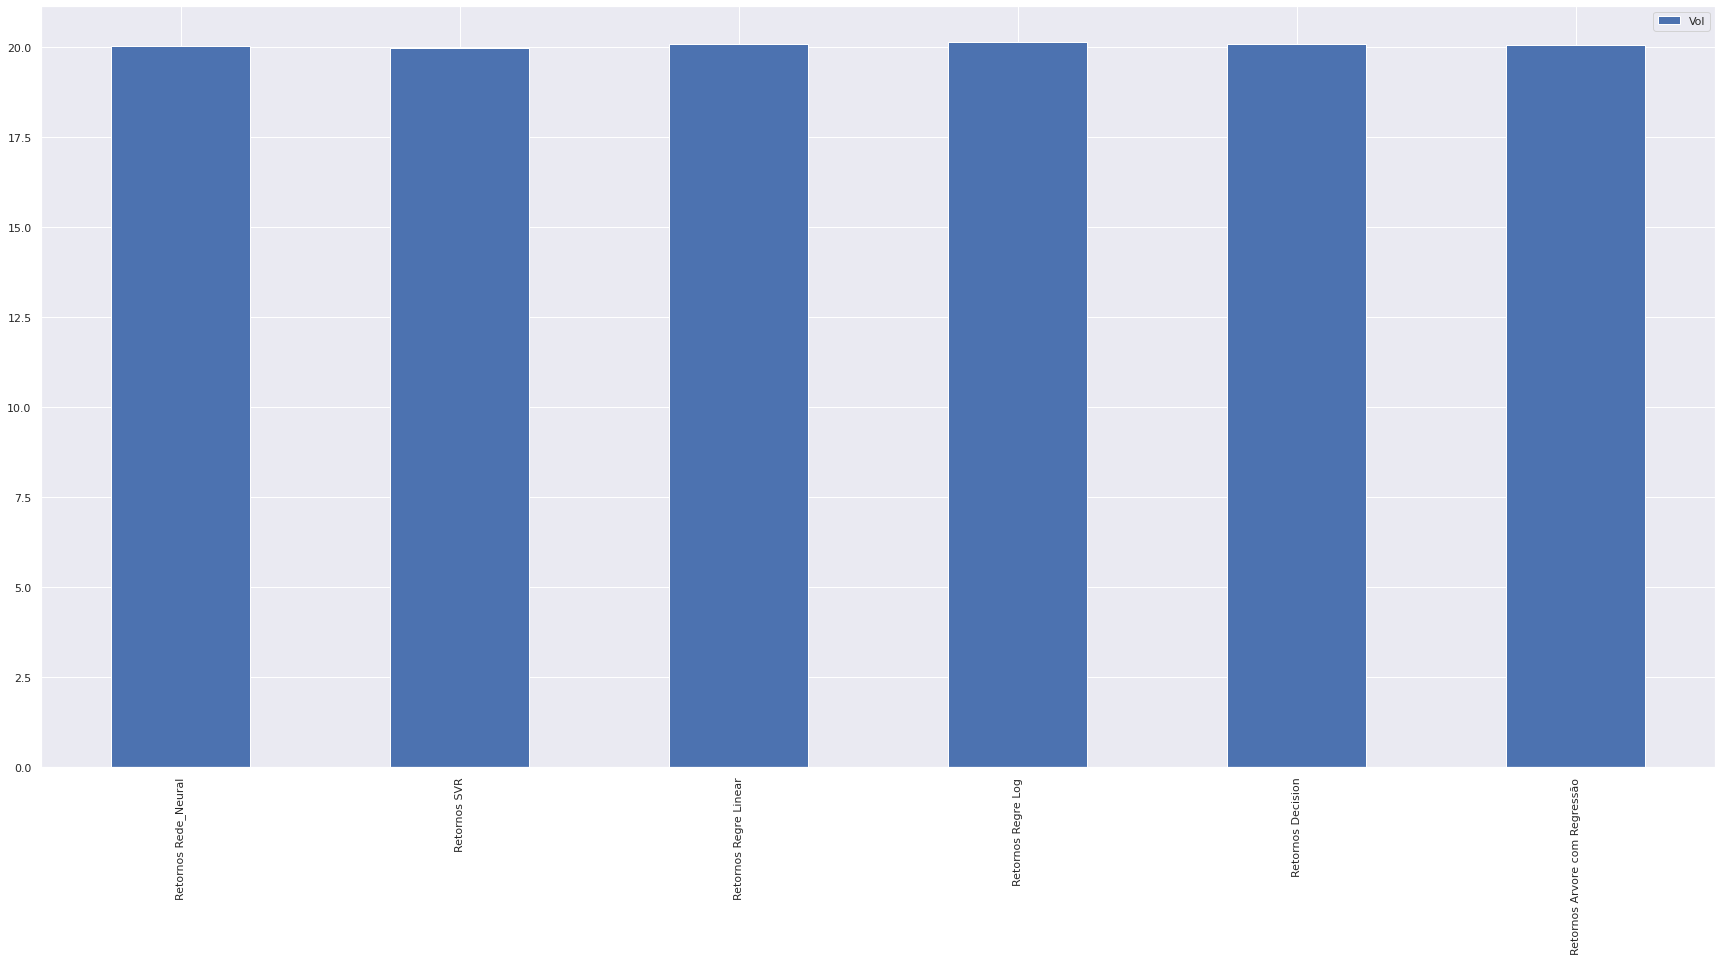

In [74]:

pd.DataFrame(estrategias.iloc[:, [0,2,4,6,8,10]].std()*np.sqrt(252) * 100, columns = ["Vol"]).plot.bar()

In [75]:
pd.DataFrame(estrategias.iloc[:, [1,3,5,7,9,11]].iloc[len(estrategias)-1] - estrategias.iloc[:, [1,3,5,7,9,11]].iloc[0], columns = ["Retorno Total"])

,Retorno Total
Retorno Acum Rede_Neural,-0.181518
Retorno Acum SVR,0.262318
Retorno Acum Regre Linear,0.141652
Retorno Acum Regre Log,-0.006000
Retorno Acum Decision,-0.132677
Retorno Acum Arvore com Regressão,-0.178149


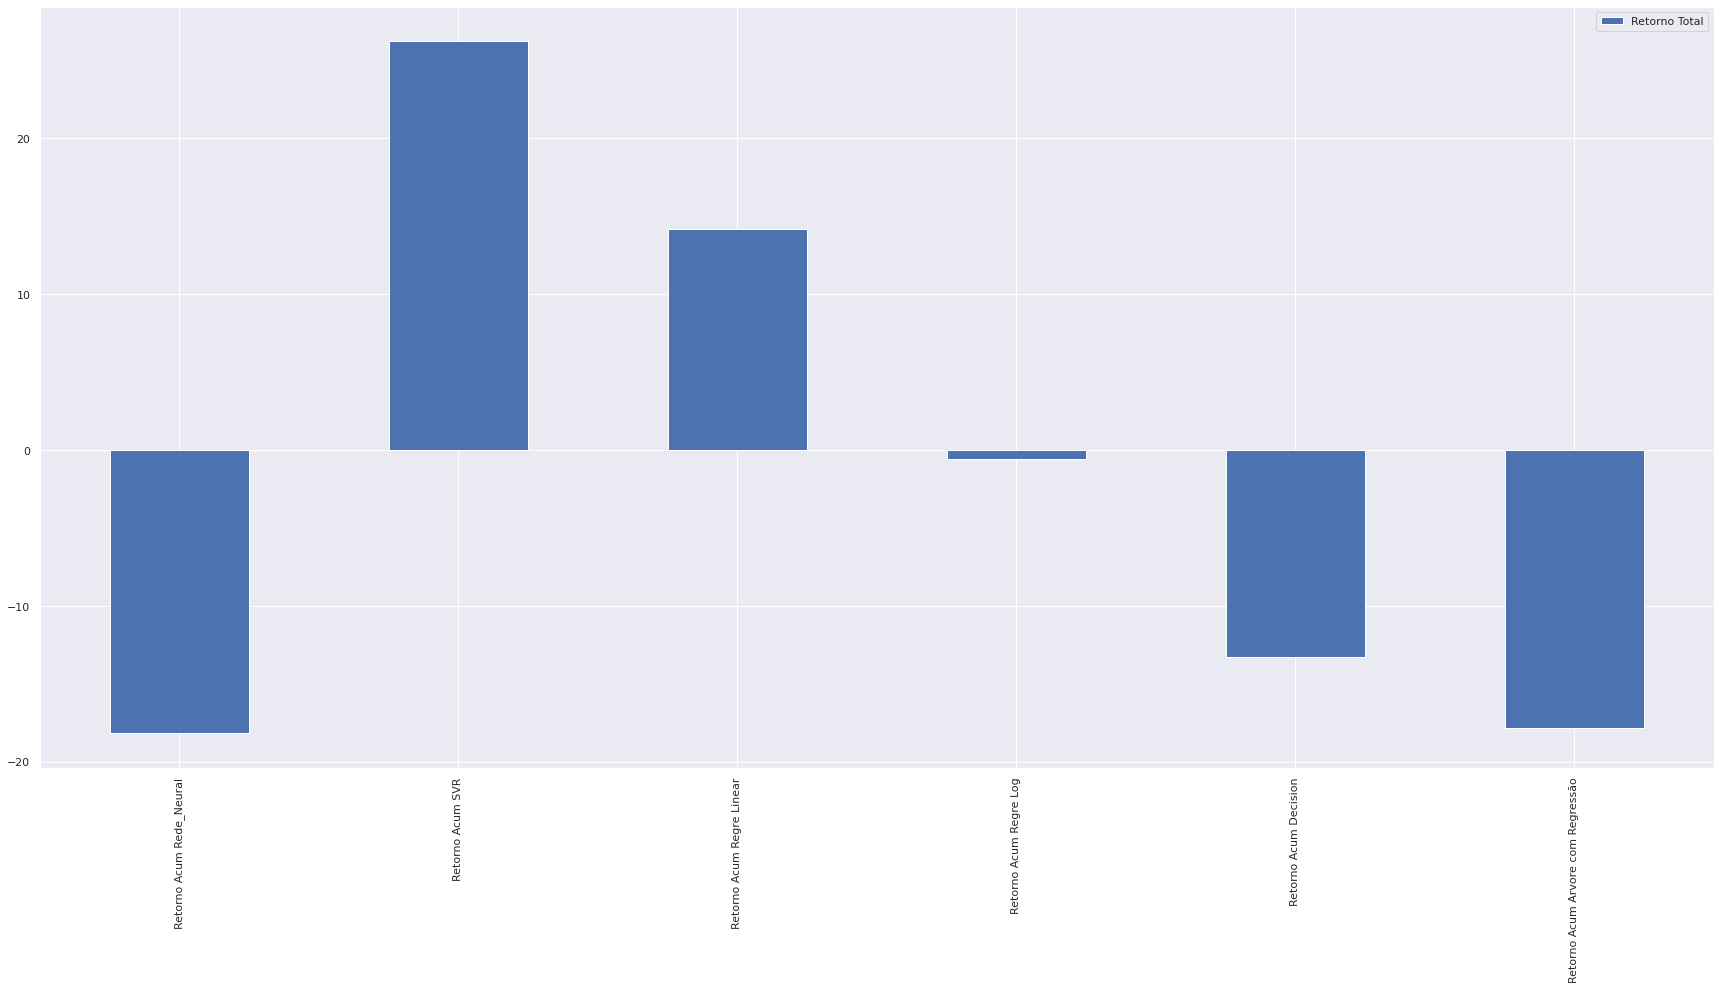

In [76]:
pd.DataFrame((estrategias.iloc[:, [1,3,5,7,9,11]].iloc[len(estrategias)-1] - estrategias.iloc[:, [1,3,5,7,9,11]].iloc[0]) * 100, columns = ["Retorno Total"]).plot.bar()

Testando hipótese da estratégia ter retornos acima do ibov 

In [77]:
from scipy.stats import ttest_rel
from statsmodels.stats.weightstats import ztest

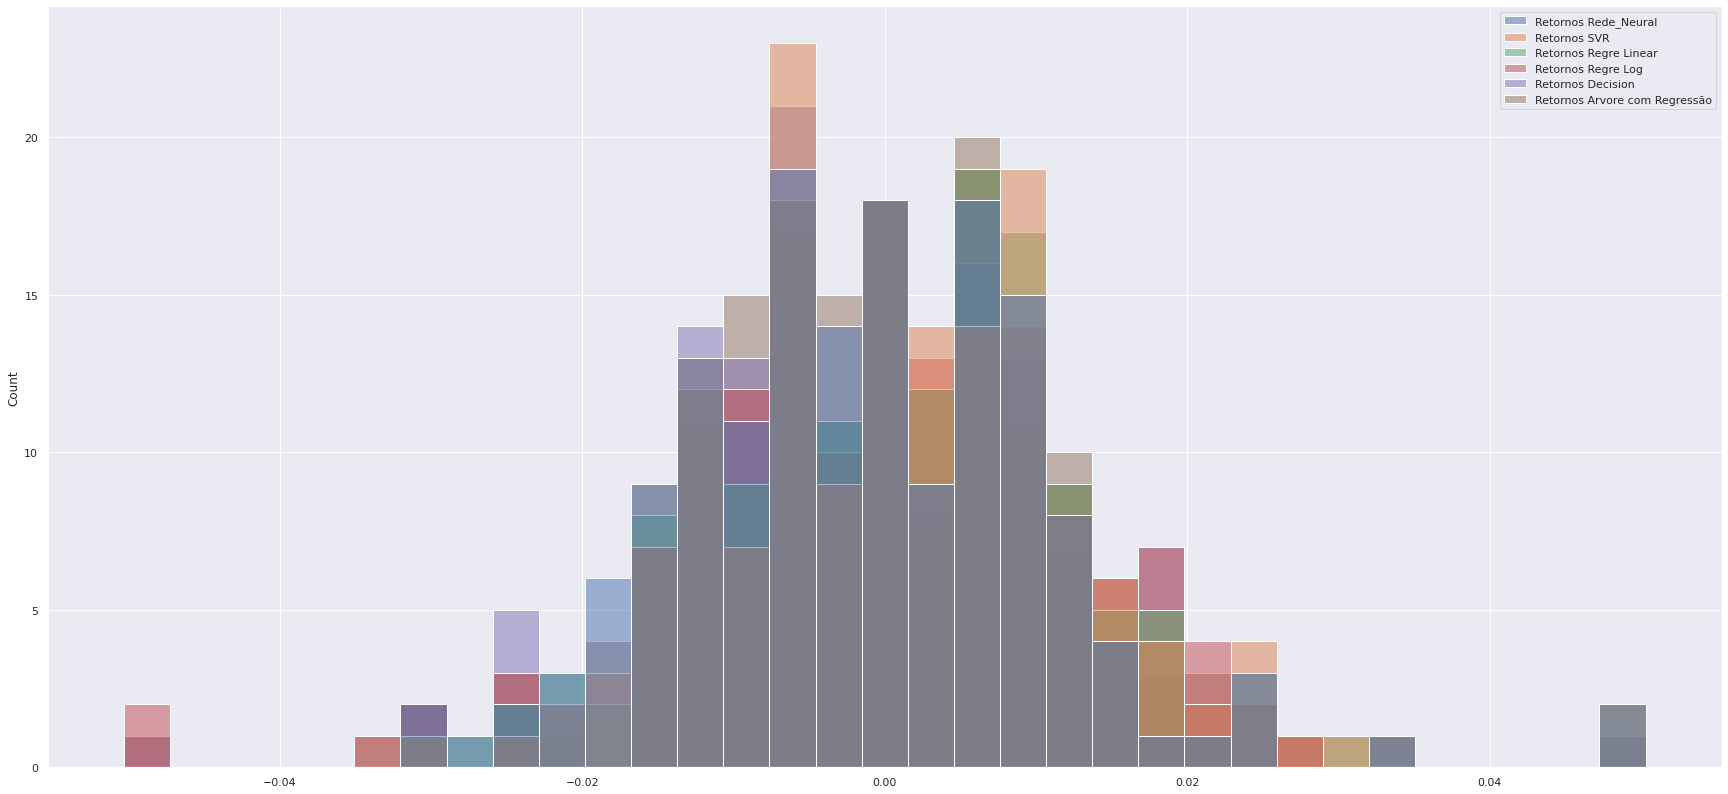

In [78]:
sns.histplot(estrategias.iloc[:, [0,2,4,6,8,10]], kde = False)

In [79]:
H1_media = alvo_teste.pct_change().mean()

for t,k in enumerate(estrategias.iloc[:, [0,2,4,6,8,10]]):

  H0_media = estrategias[k].mean()
  
  _, p = ztest(alvo_teste.pct_change(), estrategias.iloc[:, 0],
             value = H1_media - H0_media,
             alternative='larger')
  
  alpha = 0.10
  if p <= alpha:
    print(f'A estratégia com {k} possui média de retornos maiores que o Ibovespa')
  else:
    print(f'A estratégia com {k} NÃO possui média de retornos maiores que o Ibovespa')


A estratégia com Retornos Rede_Neural NÃO possui média de retornos maiores que o Ibovespa
A estratégia com Retornos SVR NÃO possui média de retornos maiores que o Ibovespa
A estratégia com Retornos Regre Linear NÃO possui média de retornos maiores que o Ibovespa
A estratégia com Retornos Regre Log NÃO possui média de retornos maiores que o Ibovespa
A estratégia com Retornos Decision NÃO possui média de retornos maiores que o Ibovespa
A estratégia com Retornos Arvore com Regressão NÃO possui média de retornos maiores que o Ibovespa
